# LendingClub Loan Prediction - EDA (Exploratory Data Analysis)
## Author: Congjun Huang

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [106]:
loan_df = pd.read_csv('lending_club_loan_two.csv')
loan_df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


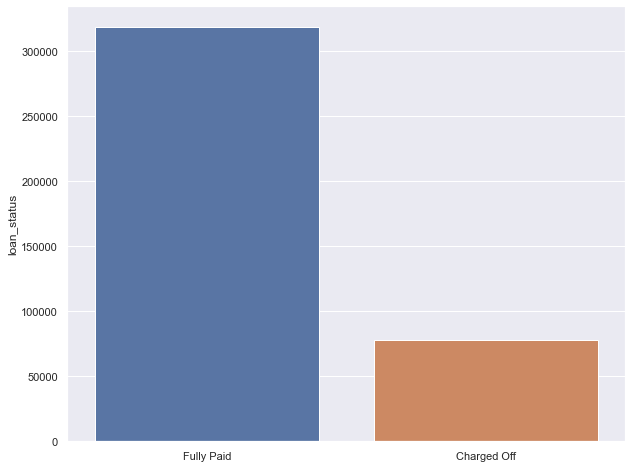

In [116]:
# distribution plots for final loan status (bar charts)
plt.figure(figsize=(10,8))
sns.barplot(x=loan_df['loan_status'].unique(), y=loan_df['loan_status'].value_counts())
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='mort_acc'>

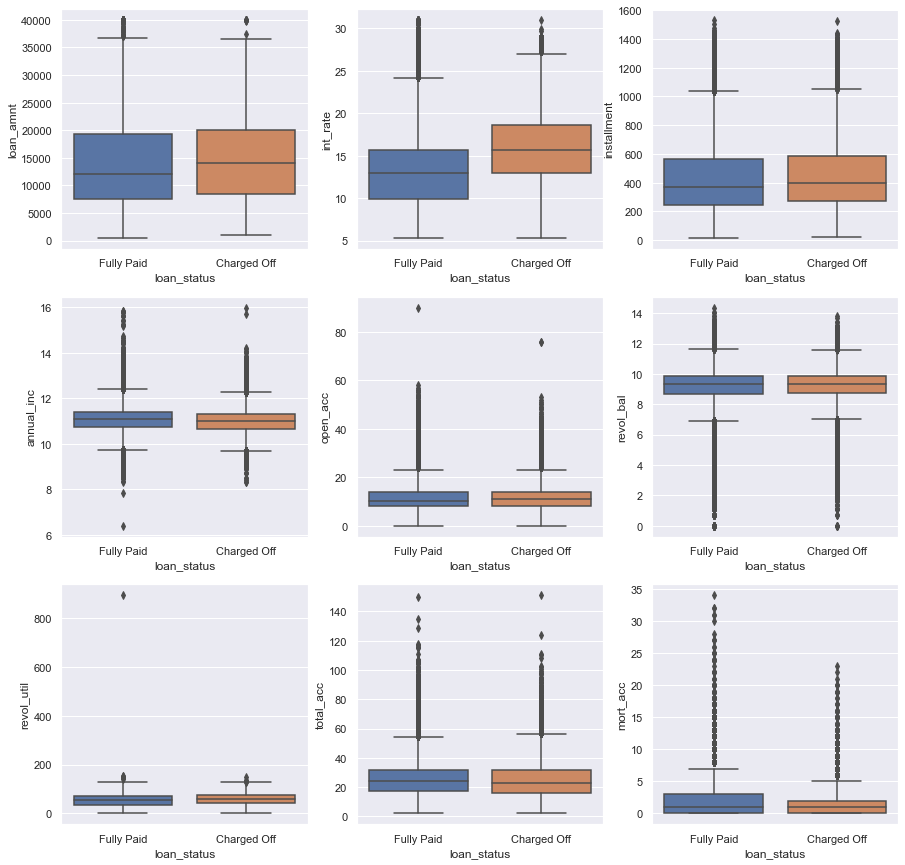

In [107]:
# relationships between numercial features and final loan status (boxplots)
fig, axs = plt.subplots(3,3,figsize=(15,15))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_df, ax=axs[0][0])
sns.boxplot(x='loan_status', y='int_rate', data=loan_df, ax=axs[0][1])
sns.boxplot(x='loan_status', y='installment', data=loan_df, ax=axs[0][2])
sns.boxplot(x='loan_status', y=np.log(loan_df['annual_inc']), data=loan_df, ax=axs[1][0])
sns.boxplot(x='loan_status', y='open_acc', data=loan_df, ax=axs[1][1])
sns.boxplot(x='loan_status', y=np.log(loan_df['revol_bal']), data=loan_df, ax=axs[1][2])
sns.boxplot(x='loan_status', y='revol_util', data=loan_df, ax=axs[2][0])
sns.boxplot(x='loan_status', y='total_acc', data=loan_df, ax=axs[2][1])
sns.boxplot(x='loan_status', y='mort_acc', data=loan_df, ax=axs[2][2])

<AxesSubplot:xlabel='mort_acc', ylabel='Density'>

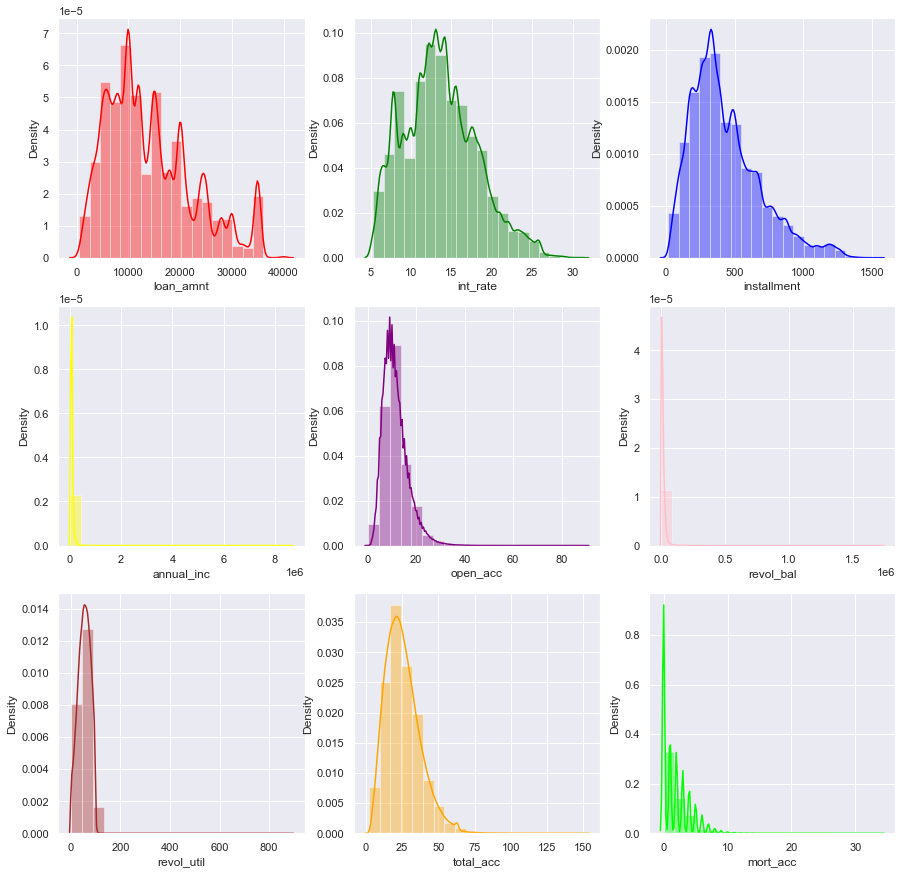

In [108]:
# distribution plots for numerical features
fig, axs = plt.subplots(3,3,figsize=(15,15))
sns.distplot(loan_df['loan_amnt'], bins=20, kde=True, color ='red', ax=axs[0][0])
sns.distplot(loan_df['int_rate'], bins=20, kde=True, color='green', ax=axs[0][1])
sns.distplot(loan_df['installment'], bins=20, kde=True, color='blue', ax=axs[0][2])
sns.distplot(loan_df['annual_inc'], bins=20, kde=True, color='yellow', ax=axs[1][0])
sns.distplot(loan_df['open_acc'], bins=20, kde=True, color='purple', ax=axs[1][1])
sns.distplot(loan_df['revol_bal'], bins=20, kde=True, color='pink', ax=axs[1][2])
sns.distplot(loan_df['revol_util'], bins=20, kde=True, color='brown', ax=axs[2][0])
sns.distplot(loan_df['total_acc'], bins=20, kde=True, color='orange', ax=axs[2][1])
sns.distplot(loan_df['mort_acc'], bins=20, kde=True, color='lime', ax=axs[2][2])

<AxesSubplot:xlabel='loan_status', ylabel='count'>

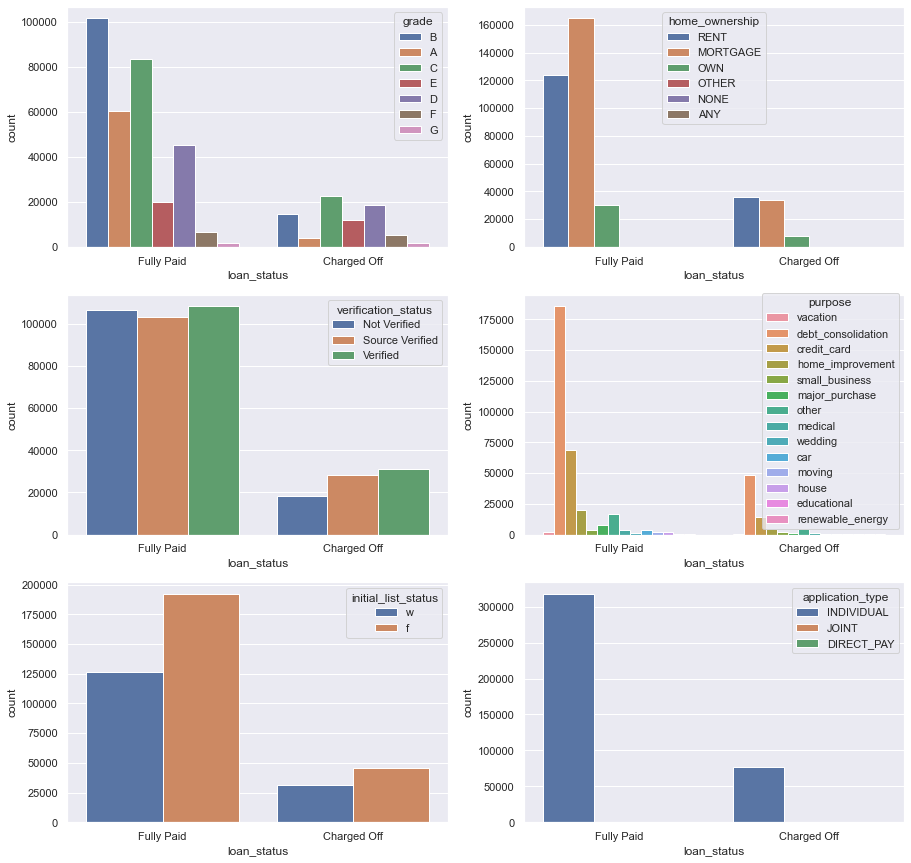

In [109]:
# relationships between categorical features and final loan status (bar charts)
fig, axs = plt.subplots(3,2,figsize=(15,15))
sns.countplot(x='loan_status', hue='grade', data=loan_df, ax=axs[0][0])
sns.countplot(x='loan_status', hue='home_ownership', data=loan_df, ax=axs[0][1])
sns.countplot(x='loan_status', hue='verification_status', data=loan_df, ax=axs[1][0])
sns.countplot(x='loan_status', hue='purpose', data=loan_df, ax=axs[1][1])
sns.countplot(x='loan_status', hue='initial_list_status', data=loan_df, ax=axs[2][0])
sns.countplot(x='loan_status', hue='application_type', data=loan_df, ax=axs[2][1])

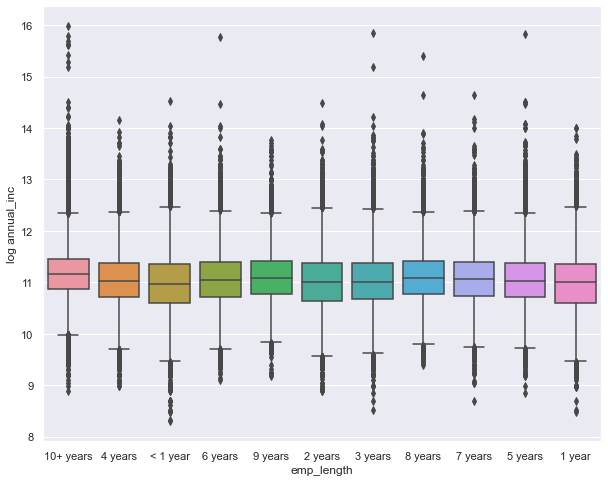

In [110]:
# trends between numerical and categorical features
plt.figure(figsize=(10,8))
sns.boxplot(x='emp_length', y=np.log(loan_df['annual_inc']), data=loan_df)
plt.ylabel('log annual_inc')
plt.show()

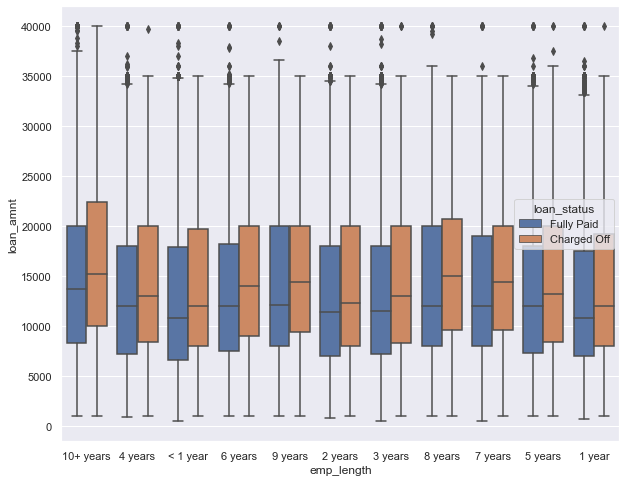

In [111]:
# trends between numerical and categorical features
plt.figure(figsize=(10,8))
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=loan_df)
plt.show()